#**Model Training using Different ML algorithms**

##**Loading the dataset from file called final_dataset.csv**

In [ ]:
!nvidia-smi

In [ ]:
#Importing  Essential Python Modules required during the training
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt

##**Load the dataset whose training need to be done**

In [ ]:
dataset=pd.read_csv("/content/sample_data/gen_phish_dataset.csv")
feature_names=dataset.columns

In [ ]:
dataset.head()

,Domain,Have_HTTPS,Have_At,URL_Length,URL_Depth,Redirection,http_https_Domain,Prefix_Suffix,SubDomainCount,DNS_Record,...,FormMail,NonStandardPort,SubPagesCount,IndexPagesCount,MLSTagsRatio,Anchor_URL,RequestUrl,Empty_Link,visibilityMode,Label
0,http://bt.attadbehind.work/cl/0_pt/17/120478/8...,1,0,53,7,0,0,0,0,0,...,1,0,0,0,1.0,1.0,1.0,1.0,1,0
1,https://mnuc2a.webwave.dev/,0,0,27,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0,0
2,http://mnuc2a.webwave.dev/,1,0,26,0,0,0,0,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0,0
3,https://winter-hat-9e79.lj1pache.workers.dev/,0,0,45,0,0,0,1,0,0,...,0,0,0,0,1.0,1.0,0.0,0.0,0,0
4,https://sp960402.sitebeat.crazydomains.com/,0,0,43,0,0,0,0,0,0,...,0,0,0,0,1.0,1.0,1.0,0.0,0,0


In [ ]:
pd.set_option("display.max_columns",33)

In [ ]:
pd.set_option("display.max_columns",33)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4934 entries, 0 to 4933
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Domain                   4934 non-null   object 
 1   Have_HTTPS               4934 non-null   int64  
 2   Have_At                  4934 non-null   int64  
 3   URL_Length               4934 non-null   int64  
 4   URL_Depth                4934 non-null   int64  
 5   Redirection              4934 non-null   int64  
 6   http_https_Domain        4934 non-null   int64  
 7   Prefix_Suffix            4934 non-null   int64  
 8   SubDomainCount           4934 non-null   int64  
 9   DNS_Record               4934 non-null   int64  
 10  AgeOfDomain              4934 non-null   int64  
 11  Domain_End               4934 non-null   int64  
 12  iFrame                   4934 non-null   int64  
 13  Mouse_Over               4934 non-null   int64  
 14  Right_Click             

In [ ]:
dataset['Label'].value_counts()#,gen_legi['Label'].value_counts(),gen_phish['Label'].value_counts()

0    2511
1    2423
Name: Label, dtype: int64

In [ ]:
pd.set_option("display.max_columns",33)
dataset.describe()

,Have_HTTPS,Have_At,URL_Length,URL_Depth,Redirection,http_https_Domain,Prefix_Suffix,SubDomainCount,DNS_Record,AgeOfDomain,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Google_Index,Favicon,CopyRightSymbol,CopyRightYear,Domain_Around_CopyRight,LinkRatio,SSL_Domain_Name,Submit_Handler,FormMail,NonStandardPort,SubPagesCount,IndexPagesCount,MLSTagsRatio,Anchor_URL,RequestUrl,Empty_Link,visibilityMode,Label
count,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000,4934.000000
mean,0.211188,0.019051,61.020673,0.598095,0.027767,0.000203,0.386299,0.021484,0.333401,0.543981,0.643089,0.094447,0.065464,0.065667,0.073976,0.050263,0.375760,0.890555,0.990272,0.998176,0.538988,0.907985,0.065464,0.065464,0.017430,1.196190,0.391366,0.877048,0.475417,0.333852,0.120328,0.074382,0.491082
std,0.408193,0.136720,74.349360,1.222469,0.164320,0.014236,0.486950,0.145004,0.471476,0.498112,0.479137,0.292479,0.247368,0.247724,0.261759,0.218510,0.484368,0.312228,0.098162,0.042675,0.494643,0.289076,0.247368,0.247368,0.130881,13.052841,18.923519,0.300235,0.471192,0.467095,0.309151,0.262418,0.499971
min,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.514706,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,51.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,822.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,633.000000,1220.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# %matplotlib inline 
# dataset.hist(bins=50 , figsize=(20,15))

In [ ]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(dataset,test_size=0.2,random_state=42)
print("train_set length : ",len(train_set))
print("test_set length : ",len(test_set))
print("total length : ",len(dataset))

train_set length :  3947
test_set length :  987
total length :  4934


In [ ]:
#To avoid imvalence train set 
from sklearn.model_selection import StratifiedShuffleSplit 
split_data=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split_data.split(dataset,dataset['Label']):
    strat_train_set=dataset.loc[train_index]
    strat_test_set=dataset.loc[test_index]

In [ ]:
strat_test_set['Label'].value_counts(),strat_train_set['Label'].value_counts()

(0    502
 1    485
 Name: Label, dtype: int64,
 0    2009
 1    1938
 Name: Label, dtype: int64)

In [ ]:
dataset=strat_train_set.copy()
testdata=strat_test_set.copy()
dataset.shape,testdata.shape

((3947, 34), (987, 34))

In [ ]:
# corr_matrix=dataset.corr()
# corr_matrix['Label'].sort_values(ascending=False)

In [ ]:
# from pandas.plotting import scatter_matrix 
# scatter_matrix(dataset,figsize=(30,20))

In [ ]:
dataset_x=strat_train_set.drop(['Domain','Label'],axis=1)
dataset_y=strat_train_set["Label"].copy()
dataset_x.shape,dataset_y.shape

((3947, 32), (3947,))

In [ ]:
test_x=strat_test_set.drop(['Domain','Label'],axis=1)
test_y=strat_test_set["Label"].copy()

In [ ]:
dataset_x.head()

,Have_HTTPS,Have_At,URL_Length,URL_Depth,Redirection,http_https_Domain,Prefix_Suffix,SubDomainCount,DNS_Record,AgeOfDomain,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Google_Index,Favicon,CopyRightSymbol,CopyRightYear,Domain_Around_CopyRight,LinkRatio,SSL_Domain_Name,Submit_Handler,FormMail,NonStandardPort,SubPagesCount,IndexPagesCount,MLSTagsRatio,Anchor_URL,RequestUrl,Empty_Link,visibilityMode
3023,0,0,34,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1.0,1,0,0,0,0,0,1.0,0.000000,0.0,0.000000,0
1098,1,0,473,3,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0.0,1,0,0,0,2,0,1.0,0.666667,0.0,0.000000,0
3747,1,0,32,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1.0,1,0,0,0,0,0,1.0,0.000000,0.0,0.000000,0
1836,1,0,33,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1.0,1,0,0,0,0,0,1.0,0.000000,0.0,0.000000,0
3443,0,0,43,1,0,0,1,0,0,1,1,0,0,0,0,0,1,1,1,1,0.0,1,0,0,0,0,0,1.0,1.000000,1.0,0.941176,0


In [ ]:
dataset_y.head()

3023    1
1098    0
3747    1
1836    0
3443    1
Name: Label, dtype: int64

In [ ]:
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler,MinMaxScaler 
my_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="mean")),
    ('std_scaler',StandardScaler())
])

In [ ]:
dataset_x=my_pipeline.fit_transform(dataset_x)
test_x=my_pipeline.fit_transform(test_x)

In [ ]:
print("training data :",dataset_x.shape)
print("testing data :",test_x.shape)
print("label of training data :",dataset_y.shape)
print("label of test data :",test_y.shape)

training data : (3947, 32)
testing data : (987, 32)
label of training data : (3947,)
label of test data : (987,)


#**GridSearchCV**

In [ ]:
# Number of trees in random forest
# n_estimators = [100,150,200,250,300]
# criterion =["gini", "entropy", "log_loss"]
# max_features = [0.8,'sqrt', 'log2',None]
# max_depth = [8,10,None]
# max_samples = [0.75,1.0,None]
# param_grid = {'n_estimators': n_estimators,
#               'criterion':criterion,
#                'max_features': max_features,
#                'max_depth': max_depth,
#               'max_samples':max_samples,
#              }
# print(param_grid)

{'n_estimators': [100, 150, 200, 250, 300], 'criterion': ['gini', 'entropy', 'log_loss'], 'max_features': [0.8, 'sqrt', 'log2', None], 'max_depth': [8, 10, None], 'max_samples': [0.75, 1.0, None]}


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score,confusion_matrix
# from sklearn.neural_network import MLPClassifier
# rf = RandomForestClassifier()
# mlp=MLPClassifier(alpha=0.001,learning_rate='adaptive',random_state=42,hidden_layer_sizes=([100,100,100]))
# rf.fit(dataset_x,dataset_y)

Train Ensemble Accuracy: 0.9819659639319278
Test Ensemble Accuracy: 0.9472081218274112


array([[481,  19],
       [ 33, 452]])

##**Training Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest =RandomForestClassifier(n_estimators=300,random_state=42,max_features=.75)
forest.fit(dataset_x,dataset_y)

RandomForestClassifier(max_features=0.75, n_estimators=300, random_state=42)

##**Finding out traning and testng accuracy of Random Forest Classifier**

In [ ]:
from sklearn.metrics import accuracy_score
predicted_train_y= forest.predict(dataset_x)
#computing the accuracy of the model performance
train_data_acc= accuracy_score(dataset_y,predicted_train_y)
print("Random forest: Accuracy on train Data: {:.3f}".format(train_data_acc))
print('--------------------------------------------')
predicted_y= forest.predict(test_x)
#computing the accuracy of the model performance
test_data_acc= accuracy_score(test_y,predicted_y)
print("Random forest: Accuracy on test Data: {:.3f}".format(test_data_acc))

Random forest: Accuracy on train Data: 0.995
--------------------------------------------
Random forest: Accuracy on test Data: 0.973


##**Calculating Performance matric of Random Forest Classifier**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
# Precision
precision = precision_score(test_y,predicted_y)
print('Precision:', precision)

# Recall
recall = recall_score(test_y,predicted_y)
print('Recall:', recall)

# F1 score
f1 = f1_score(test_y,predicted_y)
print('F1 score:', f1)

# Confusion matrix
confusion_mat = confusion_matrix(test_y,predicted_y)
print('Confusion matrix:', confusion_mat)


fig, ax = plt.subplots()

# Plot the confusion matrix as an image
im = ax.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.Blues)

# Add a colorbar
fig.colorbar(im)

# Add labels for the x and y axes
ax.set(xticks=np.arange(confusion_mat.shape[1]),
       yticks=np.arange(confusion_mat.shape[0]),
       xticklabels=['Predicted 0', 'Predicted 1'], 
       yticklabels=['True 0', 'True 1'],
       xlabel='Predicted label',
       ylabel='True label')

# Add the actual values in the plot
thresh = confusion_mat.max() / 2.0
for i in range(confusion_mat.shape[0]):
    for j in range(confusion_mat.shape[1]):
        ax.text(j, i, format(confusion_mat[i, j], 'd'), ha="center", va="center", color="white" if confusion_mat[i, j] > thresh else "black")

# Set the plot title
ax.set_title('Confusion Matrix')

# Display the plot
plt.show()

fpr, tpr, _ = roc_curve(test_y,predicted_y)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='g', lw=2, label='ROC curve (area = %0.6f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

##**Ploting the graph of performance matrics**

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score,precision_recall_curve
precision, recall, f1_score, _ = precision_recall_fscore_support(test_y,predicted_y, average='binary')
accuracy = accuracy_score(test_y,predicted_y)

values = [accuracy, precision, recall, f1_score]
labels = ['Accuracy', 'Precision', 'Recall', 'F1 score']

# Plot the bar graph
fig, ax = plt.subplots()
rects = ax.bar(labels, values, color='g')

# Add text labels to the bars
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, round(height, 6), ha='center', va='bottom', fontsize=10)

# Set the y-axis limit
plt.ylim([0, 1.2])
plt.title('Performance Metrics')

# Display the plot
plt.show()

##**Observing the importance of features of Random Forest Classifier**

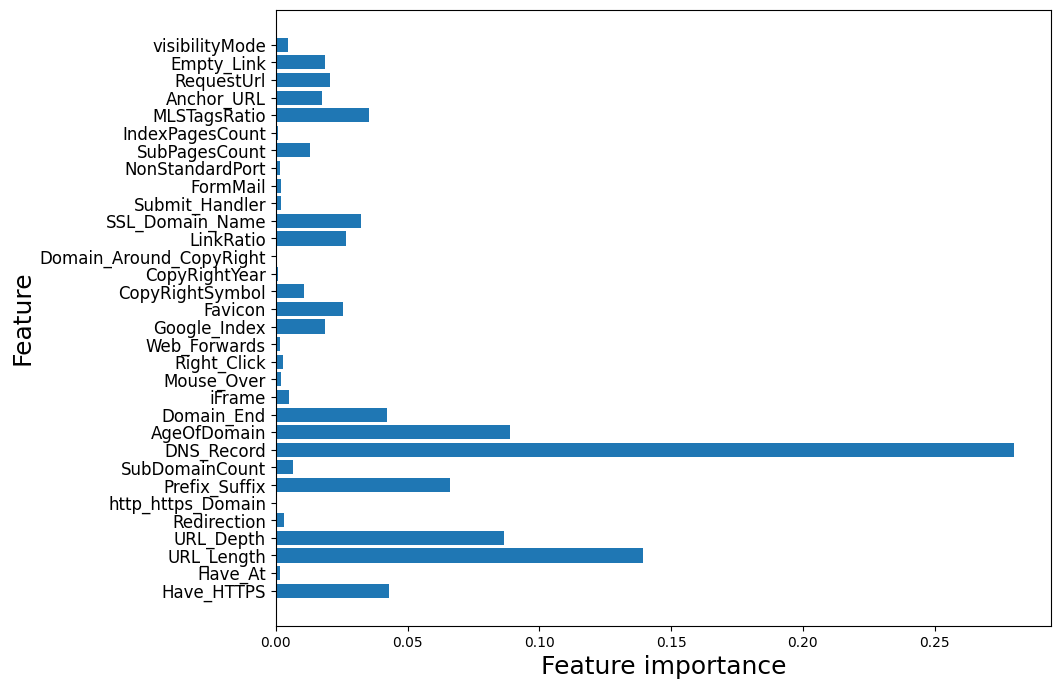

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(10,8))
features_count = dataset_x.shape[1]
plt.barh(range(features_count), forest.feature_importances_, align='center')
plt.yticks(np.arange(features_count),feature_names.drop(['Label','Domain']),fontsize=12)
plt.xlabel("Feature importance",fontsize=18)
plt.ylabel("Feature",fontsize=18)
plt.show()

#**Training Decision Tree Classifier**

In [ ]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier
# instantiate the model 
tree = DecisionTreeClassifier(criterion='gini',max_depth=6,random_state=42)
# fit the model 
tree.fit(dataset_x,dataset_y)

DecisionTreeClassifier(max_depth=6, random_state=42)

##**Finding out traning and testng accuracy of Decision Tree Classifier**

In [ ]:
from sklearn.metrics import accuracy_score
predicted_train_y= tree.predict(dataset_x)
#computing the accuracy of the model performance
train_data_acc= accuracy_score(dataset_y,predicted_train_y)
print("Decision Tree: Accuracy on train Data: {:.3f}".format(train_data_acc))
print('--------------------------------------------')
predicted_test_y= tree.predict(test_x)
#computing the accuracy of the model performance
test_data_acc= accuracy_score(test_y,predicted_test_y)
print("Decision Tree: Accuracy on test Data: {:.3f}".format(test_data_acc))

Decision Tree: Accuracy on train Data: 0.973
--------------------------------------------
Decision Tree: Accuracy on test Data: 0.970


##**Observing the importance of features of Decision Tree Classifier**

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
features_count = dataset_x.shape[1]
plt.barh(range(features_count), tree.feature_importances_, align='center')
plt.yticks(np.arange(features_count),feature_names.drop(['Label','Domain']))
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

#**Trying XGBoost Classifier**

In [ ]:
#XGBoost Classification model
from xgboost import XGBClassifier
# instantiate the model
xgb = XGBClassifier(learning_rate=0.04,max_depth=None,n_estimators=250,n_jobs=-1)
#fit the model
xgb.fit(dataset_x,dataset_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.04, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
from sklearn.metrics import accuracy_score
predicted_train_y= xgb.predict(dataset_x)
#computing the accuracy of the model performance
train_data_acc= accuracy_score(dataset_y,predicted_train_y)
print("XGB Classifier: Accuracy on train Data: {:.3f}".format(train_data_acc))
print('--------------------------------------------')
predicted_test_y= xgb.predict(test_x)
#computing the accuracy of the model performance
test_data_acc= accuracy_score(test_y,predicted_test_y)
print("XGB Classifier: Accuracy on test Data: {:.3f}".format(test_data_acc))

XGB Classifier: Accuracy on train Data: 0.989
--------------------------------------------
XGB Classifier: Accuracy on test Data: 0.975


In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
features_count = dataset_x.shape[1]
plt.barh(range(features_count), xgb.feature_importances_, align='center')
plt.yticks(np.arange(features_count),feature_names.drop(['Label','Domain']))
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

##**Trying Multilayer Perceptrons(Deep Learning)**

In [ ]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier
# instantiate the model
mlp=MLPClassifier(alpha=0.001,learning_rate='adaptive',random_state=42,hidden_layer_sizes=([100,100,100])) 
# fit the model 
mlp.fit(dataset_x,dataset_y)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100],
              learning_rate='adaptive', random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
predicted_train_y= mlp.predict(dataset_x)
#computing the accuracy of the model performance
train_data_acc= accuracy_score(dataset_y,predicted_train_y)
print("MLP Classifier: Accuracy on train Data: {:.3f}".format(train_data_acc))
print('--------------------------------------------')
predicted_test_y= mlp.predict(test_x)
#computing the accuracy of the model performance
test_data_acc= accuracy_score(test_y,predicted_test_y)
print("MLP Classifier: Accuracy on test Data: {:.3f}".format(test_data_acc))

MLP Classifier: Accuracy on train Data: 0.972
--------------------------------------------
MLP Classifier: Accuracy on test Data: 0.965


In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(10,8))
features_count = dataset_x.shape[1]
hidden_layer_weights = mlp.coefs_[0]
importance_scores = np.abs(hidden_layer_weights).sum(axis=1)
plt.barh(range(features_count), importance_scores, align='center')
plt.yticks(np.arange(features_count),feature_names.drop(['Label','Domain']),fontsize=12)
plt.xlabel("Feature importance",fontsize=18)
plt.ylabel("Feature",fontsize=18)
plt.show()
plt.savefig('x.png')

#**Trying Logistic Regression**

In [ ]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
# instantiate the model
model = LogisticRegression(random_state=42,solver='newton-cg')
# fit the model 
model.fit(dataset_x,dataset_y)

LogisticRegression(random_state=42, solver='newton-cg')

In [ ]:
from sklearn.metrics import accuracy_score
predicted_train_y= model.predict(dataset_x)
#computing the accuracy of the model performance
train_data_acc= accuracy_score(dataset_y,predicted_train_y)
print("Logistic Regression: Accuracy on train Data: {:.3f}".format(train_data_acc))
print('--------------------------------------------')
predicted_test_y= model.predict(test_x)
#computing the accuracy of the model performance
test_data_acc= accuracy_score(test_y,predicted_test_y)
print("Logistic Regression: Accuracy on test Data: {:.3f}".format(test_data_acc))

Logistic Regression: Accuracy on train Data: 0.970
--------------------------------------------
Logistic Regression: Accuracy on test Data: 0.968


In [ ]:
# model.coef_[0]

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
features_count = dataset_x.shape[1]
plt.barh(range(features_count), abs(model.coef_[0]), align='center')
plt.yticks(np.arange(features_count),feature_names.drop(['Label','Domain']))
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model = SVC()
model.fit(dataset_x,dataset_y)
from sklearn.metrics import accuracy_score
predicted_train_y= model.predict(dataset_x)
#computing the accuracy of the model performance
train_data_acc= accuracy_score(dataset_y,predicted_train_y)
print("Logistic Regression: Accuracy on train Data: {:.3f}".format(train_data_acc))
print('--------------------------------------------')
predicted_test_y= model.predict(test_x)
#computing the accuracy of the model performance
test_data_acc= accuracy_score(test_y,predicted_test_y)
print("Logistic Regression: Accuracy on test Data: {:.3f}".format(test_data_acc))


Logistic Regression: Accuracy on train Data: 0.951
--------------------------------------------
Logistic Regression: Accuracy on test Data: 0.941
